In [1]:
%matplotlib inline
import sympy as sp
from sympy.matrices import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch

In [2]:
# Stress matrix
T = Matrix([
    [90, -30, 0],
    [-30, 120, -30],
    [0, -30, 90]])

# 3b) Compute stress invariants
trace = T.trace()
norm2 = T.norm()**2
det = T.det()
I = trace
II = (trace*trace - norm2)/2
III = det
print("Principle stresses:", I, II, III)

Principle stresses: 300 27900 810000


Characteristic polynomial: σ**3 - 300*σ**2 + 27900*σ - 810000


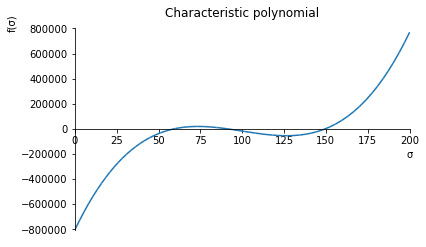

In [3]:
# 3c) Characteristic polynomial
σ = sp.symbols('σ')
polynomial = σ**3 - I*σ**2 + II*σ - III
print("Characteristic polynomial:", polynomial)
plot = sp.plot(polynomial, (σ,0,200),
               show=False,
               title="Characteristic polynomial",
        )
plot.save("plot.png")

In [4]:
# Solve polynomial
solutions = sp.solve(polynomial, σ)
solutions = sorted(solutions, reverse=True)
σ_1, σ_2, σ_3 = solutions[0], solutions[1], solutions[2]
print("Solutions to characteristic polynomial:", solutions)

Solutions to characteristic polynomial: [150, 90, 60]


In [5]:
# Compute principal directions
eigresult = T.eigenvects()
eigenvecs = []

for i, (eigval, _, eigvecs) in enumerate(eigresult):
    assert len(eigvecs) == 1
    evec = np.array(eigvecs[0]).astype(np.float64)
    eigenvecs.append(evec)
    print("Found σ with direction:", eigval, eigvecs[0])

Found σ with direction: 60 Matrix([[1], [1], [1]])
Found σ with direction: 90 Matrix([[-1], [0], [1]])
Found σ with direction: 150 Matrix([[1], [-2], [1]])


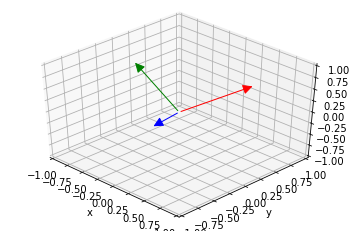

In [6]:
# Draw directions
class Arrow3D(FancyArrowPatch):
    def __init__(self, start, stop, *args,**kwargs):
        xs,ys,zs = (start[0], stop[0]), (start[1], stop[1]), (start[2], stop[2])
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs,ys,zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

def sympyToArrow(vec : sp.Matrix, color, arrowstyle):
    vec = np.array(vec).astype(np.float64)
    v = np.ndarray.flatten(vec)
    v = v/np.linalg.norm(v)
    a = Arrow3D([0,0,0], v,
                mutation_scale=20,
                lw=1,
                arrowstyle=arrowstyle,
                color=color)
    return a

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(azim=-45,elev=40)
arrows = []
colors = "rgb"
for i, vec in enumerate(eigenvecs):
    a = sympyToArrow(vec, colors[i], "-|>")
    ax.add_artist(a)

plt.savefig("principal_directions.png")

Maximum shear stress: 45 , Matrix([[30], [-15], [30]])


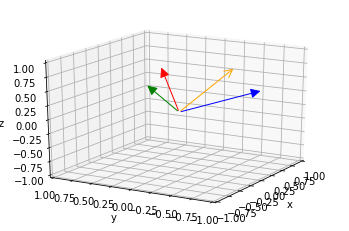

In [10]:
# Maximum shear stress
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(azim=-45,elev=40)
arrows = []
colors = "rgb"
for i, vec in enumerate(eigenvecs):
    a = sympyToArrow(vec, colors[i], "-|>")
    ax.add_artist(a)
    
eig_1, eig_3 = eigresult[2][2][0], eigresult[0][2][0]
max_shear_direction = eig_1 + eig_3
max_shear_direction = max_shear_direction/max_shear_direction.norm()
τ_max = (σ_1 - σ_3)/2
τ_1 = τ_max * max_shear_direction
print("Maximum shear stress:", τ_max, ",", τ_1)

a = sympyToArrow(τ_1, "orange", "->")
ax.add_artist(a)
ax.view_init(azim=-150,elev=20)
plt.savefig("principal_directions_and_shear.png")